In [ ]:
import plotly.graph_objects as go

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [3]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'gray',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [18]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
    width=500,  # Reduce width (adjust this as needed)
    height=400,  # Maintain readable height
)

fig.show()

In [19]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rainbow',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
    width=500,  # Reduce width (adjust this as needed)
    height=400,  # Maintain readable height
)

fig.show()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=[None] * len(df),  # No color applied
    locationmode='USA-states',
    showscale=False  # Hides color scale
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State',
    geo_scope='usa'
)

fig.show()


In [20]:
import plotly.graph_objects as go

fig = go.Figure()

# Add Choropleth map with no fill color (just state outlines)
fig.add_trace(go.Choropleth(
    locations=df['code'],
    z=[None] * len(df),  # No color applied
    locationmode='USA-states',
    showscale=False,  # Hide color scale
    marker=dict(line=dict(color='black', width=1))  # Outline for states
))

# Add text labels for states + export values
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    locations=df['code'],
    text=df['total exports'].astype(str) + "M",  # State + Exports
    mode='text',  # Display text only
    textfont=dict(size=10, color='black')  # Adjust text size and color
))

# Layout adjustments
fig.update_layout(
    title_text='2011 US Agriculture Exports by State',
    geo_scope='usa',
    width=500,  # Reduce width (adjust this as needed)
    height=400,  # Maintain readable height
)

fig.show()



In [10]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='rainbow',
    colorbar_title="Millions USD",
    text=df['state'] + ": " + df['total exports'].astype(str) + "M USD",  # Adding state name & exports
    hoverinfo="location+text"  # Show state code + text on hover
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State',
    geo_scope='usa'
)

fig.show()


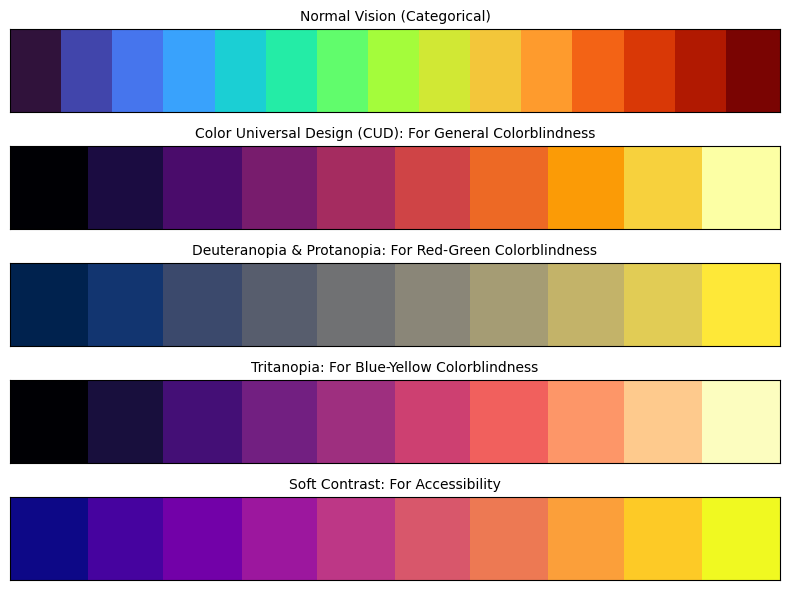

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from matplotlib.colors import ListedColormap

# Define the sequential color palettes
sequential_palettes = {
    "Normal Vision (Categorical)": px.colors.sequential.Turbo,  # Bright distinct colors for normal vision users
    "Color Universal Design (CUD): For General Colorblindness": px.colors.sequential.Inferno,  # High contrast, good for general colorblind accessibility
    "Deuteranopia & Protanopia: For Red-Green Colorblindness": px.colors.sequential.Cividis,  # Blue → Green → Yellow (Best for red-green blindness)
    "Tritanopia: For Blue-Yellow Colorblindness": px.colors.sequential.Magma,  # Black → Dark Red → Yellow (Good for tritanopia)
    "Soft Contrast: For Accessibility": px.colors.sequential.Plasma,  # Purple → Orange → Yellow (High contrast, readable for all)
}

# Create a figure with subplots for each palette
fig, axes = plt.subplots(len(sequential_palettes), figsize=(8, 6))

for i, (name, colors) in enumerate(sequential_palettes.items()):
    cmap = ListedColormap(colors)  # Convert Plotly colors to Matplotlib colormap

    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))  # Stack to make it taller

    axes[i].imshow(gradient, aspect="auto", cmap=cmap)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(name, fontsize=10)

plt.tight_layout()
plt.show()